In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
boston = fetch_openml("Boston-house-price-data", version=1)

In [4]:
boston.data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [5]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
# 实例化
regressor = DecisionTreeRegressor(random_state = 42)
cross_val_score(regressor, boston.data, boston.target, cv=10
                , scoring = "neg_mean_squared_error"
                )

array([-19.18490196, -10.20745098, -18.62411765, -60.13117647,
       -23.50627451, -34.67470588, -18.2072    , -96.6078    ,
       -56.9488    , -17.0044    ])

In [1]:
import numpy as np

In [16]:
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(80,1), axis=0)
X.shape

(80, 1)

In [19]:
#
y = np.sin(X).flatten()
y.shape

(80,)

In [22]:
# 以 5 为步长进行切片，加入噪声, 此处是 16 是匹配维度
y[::5] += 3 * (0.5 - rng.rand(16))
y.shape

(80,)

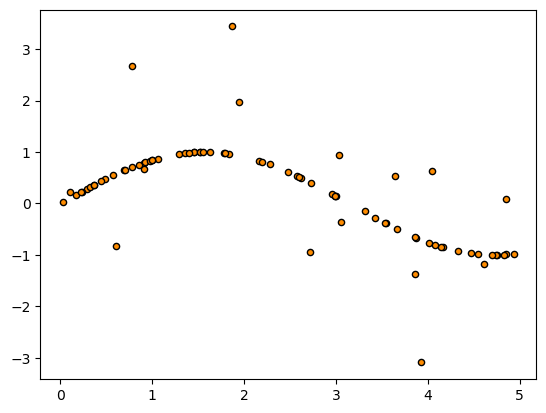

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [24]:
regr_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr_2 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
# np.newaxis 的用法, 为数据增加维度
s1 = np.array([1,2,3,4])
print(s1.shape)
print(s1[:, np.newaxis].shape)
print(s1[np.newaxis, :].shape)

(4,)
(4, 1)
(1, 4)


In [27]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
X_test.shape

(500, 1)

In [32]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

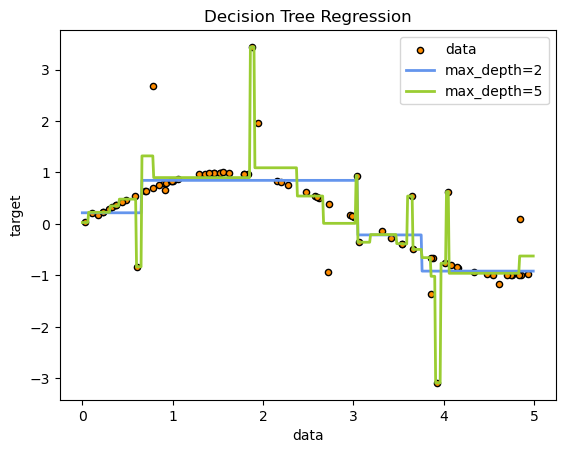

In [35]:
plt.figure()

plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend() # 显示图例
plt.show()

In [47]:
regr_1.score(X_test, np.sin(X_test))

0.9027795210239109

In [42]:
# 明显过拟合
regr_2.score(X_test, np.sin(X_test))

0.5684052106533048